In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/kirill/Projects/NIR')
sys.path.append('/home/kirilman/Projects/nir/nir/')
import myutils
import sequence_generator as generator
import numpy as np
import matplotlib.pylab as plt
from pomegranate import *
from myutils import frequency_occurrence

{'a': {'len': [2, 2], 'depend_on': False}, 'b': {'len': [2, 4], 'depend_on': False}, 'c': {'len': [0, 2], 'depend_on': False}, 'd': {'len': [1, 3], 'depend_on': 'c'}, 'e': {'len': [1, 3], 'depend_on': True}}


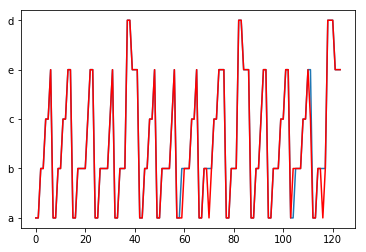

In [2]:
N = 200
sequence = generator.Sequence(N,['a','b','c','d','e'])
sequence.test_discrete()
seq = sequence.sequence
#seq = np.array(sequence.to_int()).reshape(-1,1)
#print(seq.shape)
plt.plot(seq)
anomal = sequence.anormal(0.05)
plt.plot(anomal,'r-')

In [3]:
model = MarkovChain.from_samples([seq])
model.distributions

[{
     "class" :"Distribution",
     "dtype" :"str",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "d" :0.0,
             "b" :0.0,
             "e" :0.0,
             "c" :0.0,
             "a" :1.0
         }
     ],
     "frozen" :false
 }, {
     "class" : "Distribution",
     "name" : "ConditionalProbabilityTable",
     "table" : [
         [
             "d",
             "d",
             "0.5714285714285714"
         ],
         [
             "d",
             "b",
             "0.0"
         ],
         [
             "d",
             "e",
             "0.42857142857142855"
         ],
         [
             "d",
             "c",
             "0.0"
         ],
         [
             "d",
             "a",
             "0.0"
         ],
         [
             "b",
             "d",
             "0.06818181818181818"
         ],
         [
             "b",
             "b",
             "0.6818181818181818"
         ],
         [
     

In [4]:
model.log_probability(seq)

-89.03451465685455

In [5]:
model.log_probability(anomal)

-inf

In [6]:
np.linspace(0,0.3,8)

array([0.        , 0.04285714, 0.08571429, 0.12857143, 0.17142857,
       0.21428571, 0.25714286, 0.3       ])

In [7]:
for p in np.linspace(0,0.3,0.05):
    print(p)

/home/kirill/.conda/envs/nir/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35
0.4
0.45000000000000007
0.5
0.55


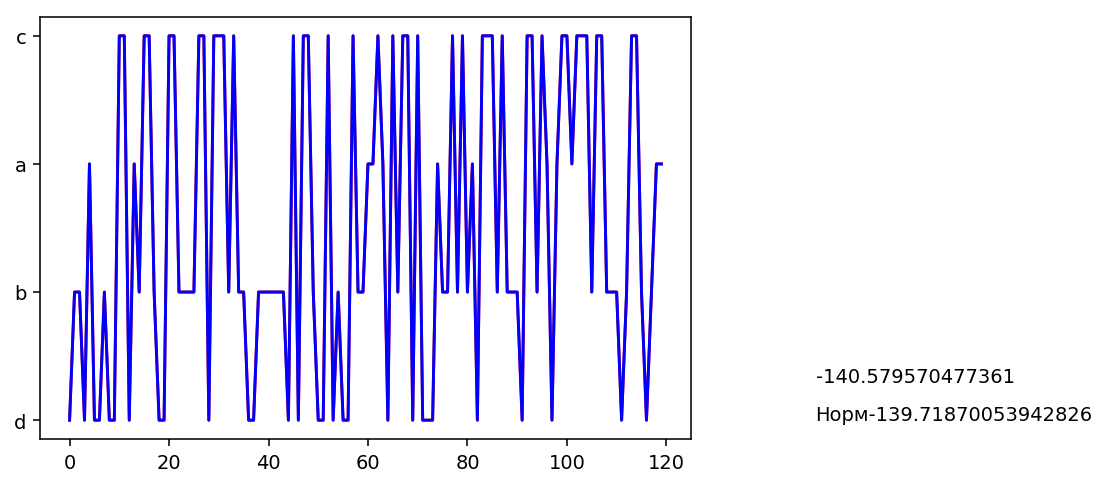

In [8]:
lvl = [0.1 + i*0.05 for i in range(10)]

normal_score = []
anormal_score = []
for p in lvl:
    print(p)
    for i in range(10):
        N = 120
        sequence = generator.Sequence(N,['a','b','c','d'],type = 'random',p=[0.1,0.5,0.8])
#         sequence.test_discrete()
        seq = sequence.sequence
        #seq = np.array(sequence.to_int()).reshape(-1,1)
        #print(seq.shape)
        s  =  sequence.sequence.copy()
        s[26] = 'c'; s[36] = 'd'
        anomal = s
        
#         plt.plot(seq,'b')
#         plt.plot(anomal,'r-')
        model = MarkovChain.from_samples([seq]);
        normal_score+=[model.log_probability(seq)]
        anormal_score+=[model.log_probability(anomal)]
#         print(model.log_probability(seq),' ',model.log_probability(anomal))
        if i == 0 and p ==lvl[3]:
            plt.figure(dpi = 140)
            plt.plot(seq,'r')
            plt.plot(anomal,'b')
            plt.text(150,0,'Норм'+str(normal_score[0]))
            plt.text(150,0.3, anormal_score[0])
            
normal_score = np.array(normal_score);
anormal_score = np.array(anormal_score)

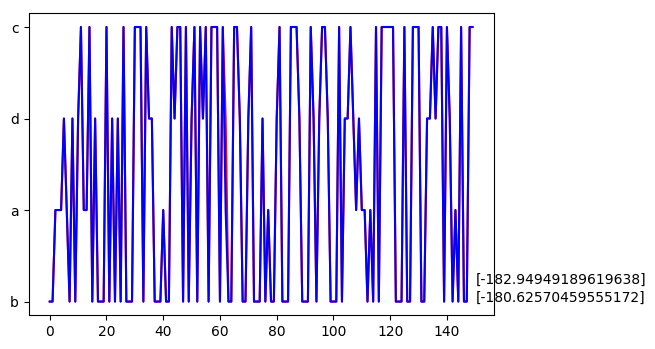

In [9]:
normal_score = []
anormal_score = []

for i in range(100):
    N = 150
    sequence = generator.Sequence(N,['a','b','c','d'],type = 'random',p=[0.1,0.5,0.8])
#         sequence.test_discrete()
    seq = sequence.sequence
    #seq = np.array(sequence.to_int()).reshape(-1,1)
    #print(seq.shape)
    s  =  sequence.sequence.copy()
    s[26] = 'c'; s[36] = 'd'; s[62] = 'd'; s[62] = 'a'
    anomal = s

#         plt.plot(seq,'b')
#         plt.plot(anomal,'r-')
    model = MarkovChain.from_samples([seq]);
    normal_score+=[model.log_probability(seq)]
    anormal_score+=[model.log_probability(anomal)]
#         print(model.log_probability(seq),' ',model.log_probability(anomal))
    if i == 0:
        plt.figure(dpi = 100)
        plt.plot(seq,'r')
        plt.plot(anomal,'b')
        plt.text(150,0,normal_score)
        plt.text(150,0.2, anormal_score)
        
normal_score = np.array(normal_score);
anormal_score = np.array(anormal_score)

In [10]:
np.sum([normal_score > anormal_score])

94

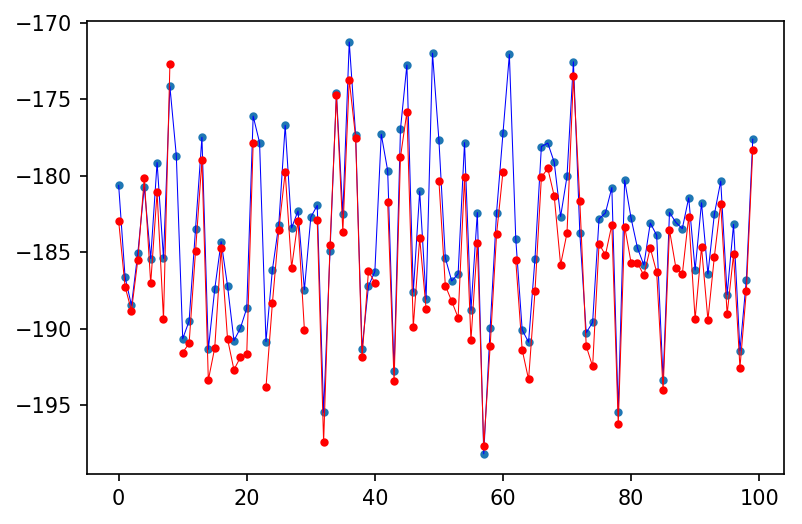

In [11]:
plt.figure(dpi = 150)
plt.plot(normal_score,'.',linewidth = 1,)
plt.plot(normal_score,'b',linewidth = 0.5)

plt.plot(anormal_score,'r.',linewidth = 0.5)
plt.plot(anormal_score,'r',linewidth = 0.5)

In [12]:
q = []
[3]*2
q.append([3]*2)
q.append(['a']*3)
q.insert(1,[1]*4)
q = [1,2,3,4,5]

In [13]:
q[-1]

5

In [14]:
q

[1, 2, 3, 4, 5]

In [15]:
##Сигнал у которого четкие переходы
def experiment_1(N=60,alpha = ['a','b','c','d','e'],p = 0.00):
    params = {'a': {'len': [1, 1], 'depend_on': False},
              'b': {'len': [1, 1], 'depend_on': False},
              'c': {'len': [0, 1], 'depend_on': False},
              'd': {'len': [0, 1], 'depend_on': 'c' },
              'e': {'len': [1, 3], 'depend_on': 'b'}}
    sequence = generator.Sequence(N,alpha)
    sequence.test_discrete(params)
    normal_seq = sequence.sequence
    anormal_seq = sequence.anormal(p)
    anormal_seq[5] = 'b'
    print(normal_seq)
    #model
    model = MarkovChain.from_samples([normal_seq]);
    #model = HiddenMarkovModel.from_samples(DiscreteDistribution,n_components = 4,X=[normal_seq]);

    normal_score = []
    anormal_score = []
    
    normal_score+=[model.log_probability(normal_seq)]
    anormal_score+=[model.log_probability(anormal_seq)]
    print("Нормальный {}, Аномальный {}".format(normal_score[0],anormal_score[0]))
    print(normal_score)
    print(anormal_score)
    plt.plot(anormal_seq,'r')
    
    plt.plot(normal_seq)
    plt.plot(normal_seq,'b.')
    plt.savefig('Дискретный с невозможным переходом.png',dpi = 150)
    #print(model.to_json())
    
    with open('experiment1.txt','w') as file:
        table = myutils.table_from_MarkovChain(model)
        for t in table:
            file.write(str(t)+'\n')
    return model

{'a': {'len': [1, 1], 'depend_on': False}, 'b': {'len': [1, 1], 'depend_on': False}, 'c': {'len': [0, 1], 'depend_on': False}, 'd': {'len': [0, 1], 'depend_on': 'c'}, 'e': {'len': [1, 3], 'depend_on': 'b'}}
['a', 'b', 'a', 'b', 'd', 'e', 'a', 'b', 'c', 'e', 'e', 'e', 'a', 'b', 'c', 'e', 'e', 'a', 'b', 'c', 'e', 'e', 'a', 'b', 'c', 'e', 'a', 'b', 'd', 'e', 'e', 'e', 'a', 'b', 'c', 'e', 'e', 'a', 'b', 'c', 'e', 'e', 'e']
Нормальный -18.603197335961084, Аномальный -inf
[-18.603197335961084]
[-inf]


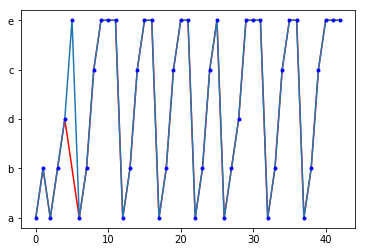

In [16]:
model = experiment_1();

In [17]:
##Сигнал у которого четкие переходы
def experiment_2(N=100,alpha = ['a','b','c','d','e'],p = 0.1):
#     params = {'a': {'len': [1, 1], 'depend_on': False},
#               'b': {'len': [1, 1], 'depend_on': False},
#               'c': {'len': [0, 1], 'depend_on': False},
#               'd': {'len': [0, 1], 'depend_on': 'c' },
#               'e': {'len': [1, 3], 'depend_on': 'b'}}
    sequence = generator.Sequence(N,alpha,type='random',p=[0.05,0.1,0.4,0.8])
    normal_seq = sequence.sequence
    anormal_seq = sequence.anormal(p)
#     anormal_seq[5] = 'b'
    print(normal_seq)
    #model
    model = MarkovChain.from_samples([normal_seq]);
    #model = HiddenMarkovModel.from_samples(DiscreteDistribution,n_components = 4,X=[normal_seq]);

    normal_score = []
    anormal_score = []
    
    normal_score+=[model.log_probability(normal_seq)]
    print(model.distributions[1])
    anormal_score+=[model.log_probability(anormal_seq)]
    print("Нормальный {}, Аномальный {}".format(normal_score[0],anormal_score[0]))
    print(normal_score)
    print(anormal_score)
    plt.plot(anormal_seq,'r')
    
    plt.plot(normal_seq,'b')
    plt.plot(normal_seq,'b.')
    plt.savefig('Дискретный с невозможным переходом.png',dpi = 150)
    #print(model.to_json())
    
    with open('experiment1.txt','w') as file:
        table = myutils.table_from_MarkovChain(model)
        for t in table:
            file.write(str(t)+'\n')
#     print(model.distributions[1])
    return model

['d', 'd', 'c', 'c', 'c', 'd', 'c', 'c', 'd', 'd', 'e', 'c', 'd', 'c', 'd', 'c', 'e', 'c', 'c', 'd', 'c', 'd', 'e', 'd', 'c', 'd', 'd', 'c', 'd', 'd', 'e', 'c', 'd', 'c', 'c', 'a', 'c', 'd', 'c', 'e', 'e', 'b', 'b', 'e', 'd', 'a', 'c', 'e', 'd', 'd', 'd', 'e', 'a', 'c', 'c', 'c', 'd', 'c', 'c', 'd', 'd', 'b', 'd', 'd', 'c', 'c', 'e', 'b', 'c', 'd', 'c', 'c', 'e', 'd', 'c', 'b', 'c', 'a', 'c', 'd', 'c', 'd', 'd', 'd', 'e', 'b', 'e', 'd', 'd', 'd', 'e', 'd', 'a', 'c', 'c', 'c', 'e', 'd', 'c', 'd']
b	b	0.16666666666666669
b	d	0.16666666666666669
b	e	0.3333333333333333
b	c	0.3333333333333333
b	a	0.0
d	b	0.02777777777777778
d	d	0.3333333333333333
d	e	0.16666666666666669
d	c	0.4166666666666667
d	a	0.05555555555555554
e	b	0.2
e	d	0.4666666666666667
e	e	0.06666666666666667
e	c	0.2
e	a	0.06666666666666667
c	b	0.02702702702702703
c	d	0.43243243243243246
c	e	0.16216216216216217
c	c	0.32432432432432434
c	a	0.054054054054054064
a	b	0.0
a	d	0.0
a	e	0.0
a	c	1.0
a	a	0.0
Нормальный -122.10268636626397,

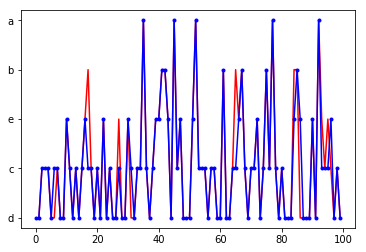

In [18]:
experiment_2()

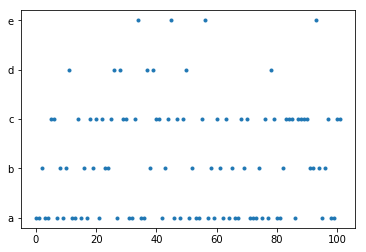

In [19]:
sequence = generator.Sequence(102,['a','b','c','d','e'],type='random',p=[0.05,0.1,0.4,0.8])
s = sequence.sequence
plt.yticks(range(7),['a','b','c','d','e'])
plt.plot(s,'.')

In [20]:
def rename_state(x):
    a = 's'+x
    return a
def experiment_3(s,n_components):
    #s = generator.Signal(5000,4,[10,10,10,12],[0.5,2,4,2],[50,100])
    seq = s.sequence
    print(seq[:10])
    v = int(len(seq)*0.8)
    x_train, x_test = seq[0:v], seq[v:]
    path_train = s.path[0:v]
    path_source = s.path[v:]
    
    labels = list(map(rename_state,list(map(str,path_train))))
    print(len(labels))
    model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = n_components,X = [x_train],
                                           labels=[labels],algorithm='labeled' )
    p = model.viterbi(x_test)
    path_test = []
    for i in p[1]:
        path_test +=[i[0]]
    path_test = path_test[1:]
    
    
    print('Длина пути для теста: soure={}, test={}'.format(len(path_source), len(path_test)))
    
    path_source = np.array(path_source)
    path_test = np.array(path_test)
    path_train = np.array(path_train)
    fig,ax = plt.subplots(3,1,dpi=140)
    ax[0].plot(x_train)
    ax[0].plot(path_train*3,'g',lw=0.9)
    
    p = model.viterbi(x_train)
    path_s = []
    
    for i in p[1]:
        path_s +=[i[0]]
    path_s = path_s[1:]
    path_s = np.array(path_s)
    ax[0].plot(path_s*3,'r')
    
    ax[2].hist(x_train,bins = int(np.log(len(x_train))+30));
    
    ax[1].plot(x_test)
    ax[1].plot(path_source*3,'g')
    ax[1].plot(path_test*3,'r--')
    plt.tight_layout()
    print(np.mean(seq))
    print(model)
    
    #--------
    signal = np.array(seq)
    return model

In [21]:
#numpy.random.seed(0)

In [22]:
signal = generator.Signal(5000,3,[10,14,10,12],[0.5,2,4,2],[50,100])
print(signal.sequence[:5])

[10.486586750518073, 9.934835766209241, 10.09198021459378, 10.400262437282883, 9.609855218241684]


[10.486586750518073, 9.934835766209241, 10.09198021459378, 10.400262437282883, 9.609855218241684, 10.292526819908307, 9.497364685736427, 10.131925912412495, 10.378490066942552, 10.142856199231616]
4000
Длина пути для теста: soure=1000, test=1000
11.444092965160857
None:{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "NormalDistribution",
        "parameters" : [
            10.006918217507879,
            0.6495092372872708
        ],
        "frozen" : false
    },
    "name" : "s0",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "NormalDistribution",
        "parameters" : [
            13.9942175734693,
            2.006850863336261
        ],
        "frozen" : false
    },
    "name" : "s1",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "NormalDistribution",
        "parameters" : [
     

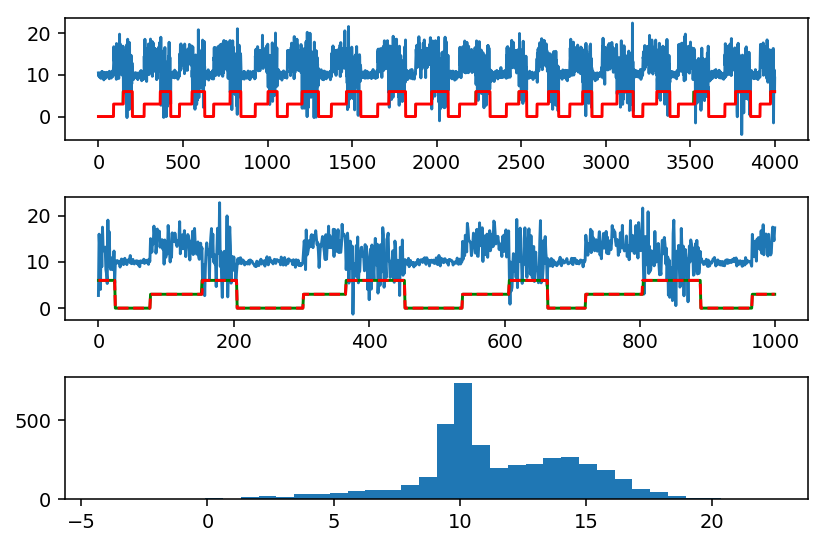

In [23]:
model = experiment_3(signal,3)

In [24]:
for i in model.viterbi(signal)[1]:
    print(i)
    break

TypeError: object of type 'Signal' has no len()

In [ ]:
s = generator.Signal(1000,3,[10,14,10,12],[0.5,2,4,2],[50,100])
signal=s.sequence
y_test = s.path

In [ ]:
log, path = model.viterbi(signal)
path =[ state.name for i, state in model.viterbi(signal)[1]]

In [ ]:
x = model.viterbi(signal)

In [ ]:
y_pred = []
for x in signal:
    y_pred.append(model.viterbi([x])[1][1][0])
    #y_test.append(model.viterbi([x])[1][1]['name'])
#plt.plot(y_pred)
plt.plot(y_test,'r')
plt.plot(y_pred)

In [ ]:
a = model.viterbi(signal[0:10])[1]
for i in a:
    print(i[0])
s = [x[0] for x in model.viterbi(signal[0:10])[1]][1:]
s

In [ ]:
y_pred = []
S = 50 

for i in range(len(signal)):
    #print(signal[i:i+step])
#     print(model.viterbi(signal[i:i+step])[1])
    a = [s[0] for s in model.viterbi(signal[i:i+step])[1] ][1:]
    
#     y_pred.append(model.viterbi([signal[i:i+step]])[1][1][0])
    y_pred = y_pred + a
    #y_test.append(model.viterbi([x])[1][1]['name'])
#plt.plot(y_pred)
plt.plot(y_test,'r')
plt.plot(y_pred,'b')
#y_pred

In [25]:
y_pred = []
step = 5
for i in range(len(signal)):
    #print(signal[i:i+step])
#     print(model.viterbi(signal[i:i+step])[1])
    a = [s[0] for s in model.viterbi(signal[i:i+step])[1] ][1:]
    
#     y_pred.append(model.viterbi([signal[i:i+step]])[1][1][0])
    y_pred = y_pred + a
    #y_test.append(model.viterbi([x])[1][1]['name'])
#plt.plot(y_pred)
plt.plot(y_test,'r')
plt.plot(y_pred,'b')
#y_pred

TypeError: object of type 'Signal' has no len()

In [26]:
y_pred = predict(model,signal,windows_size = 60,step = 10)

TypeError: predict() got an unexpected keyword argument 'windows_size'

NameError: name 'y_test' is not defined

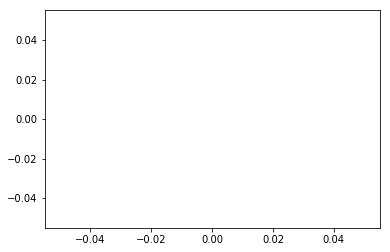

In [27]:
plt.plot(y_pred,'b')
plt.plot(y_test,'r--')

In [ ]:
from scipy import stats

space = np.linspace(min(signal),max(signal),1000)
ker  = stats.gaussian_kde(signal)
plt.plot(space,ker(space))
#plt.plot(np.mean(signal),)
plt.hist(signal,60,normed=True);

In [28]:
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,15,15,241]
#a = [0]*28


def predict(model,y_test,windows_size = 4, step = 3):
    y_pred = []
    print(len(y_test))
    print('Количество окон ',len(y_test)/step)
    for i in range(int(len(y_test)/step)):
        t = y_test[i*step:windows_size+i*step]
#         print(t)
        path = model.viterbi(t)[1]
        x = [y[0] for y in path][1:]
        if i == 0:
            y_pred = y_pred + x
        else:
            y_pred = y_pred + x[windows_size-step:]
#         print(x)
#         print('y_pred',y_pred)
#         print(t[windows_size-step:])
#     print(x)
    return y_pred

### Эксперимент с дискретным сигналом ( продолжительное состояние в каждом сигнале).

In [29]:
a = True
b = True
(a==0) or (b==0)

False

In [30]:
def get_slice(s):
    m = np.random.choice(range(len(s)))
    # m = 0
    print(m)
    c = s[m]
    start, stop = 0,0
    i = 1 
    flag_1 = True
    flag_2 = True
    while((flag_1==True) or (flag_2 == True)):
        if flag_1 == True:
            if m-i-1 == 0:
                start = m-i+1
                flag_1 = False
            else:
                if s[m - i]!=c:
                    start = m-i+1
                    flag_1 = False
        if flag_2 == True:
            if m + i - 1 == len(s) - 1:
                stop = m + i
                flag_2 = False
            else:
                if s[m+i]!=c:
                    stop = m + i
                    flag_2 = False
        i+=1
        print('i ',i)
    return start, stop, c   

In [31]:
##Сигнал у которого четкие переходы
def experiment_discret(N=120,alpha = ['a','b','c','d','e'],p = 0.05):
#     params = {'a': {'len': [1, 1], 'depend_on': False},
#               'b': {'len': [1, 1], 'depend_on': False},
#               'c': {'len': [0, 1], 'depend_on': False},
#               'd': {'len': [0, 1], 'depend_on': 'c' },
#               'e': {'len': [1, 3], 'depend_on': 'b'}}
    print(np.random.rand(2))
    sequence = generator.Sequence(N,alpha,type='test_discret',p=[0.05,0.1,0.4,0.8])
    normal_seq = sequence.sequence.copy()
    #Аномальная последовательность
#     anormal_seq = sequence.anormal(p)
    start, stop, simbol = get_slice(normal_seq)

    anormal_seq = normal_seq.copy()
    
    anormal_seq[start:stop] = ['b']*(stop - start)
    print('start',start,'stop',stop)
#     n_count = 5
#     anormal_seq[20:20+n_count] = ['b']*n_count
    print(normal_seq)
    
    print('Длина нормальной ',len(normal_seq),', аномальной ', len(anormal_seq))
    model = MarkovChain.from_samples([normal_seq]);
    model = HiddenMarkovModel(name = 'kir').from_samples(DiscreteDistribution,n_components = 5,X=[normal_seq]);

    normal_score = []
    anormal_score = []
    normal_score+=[model.log_probability(normal_seq)]
#     print(model.distributions[1])
    anormal_score+=[model.log_probability(anormal_seq)]
    print("Нормальный {}, Аномальный {}".format(normal_score[0],anormal_score[0]))
    
    #Построение графика
    plt.plot(anormal_seq,'r')    
    plt.plot(normal_seq,'b')
    plt.plot(normal_seq,'b.')
    plt.grid()
    plt.savefig('Дискретный с невозможным переходом.png',dpi = 150)
    #print(model.to_json())
    
#     with open('experiment1.txt','w') as file:
#         table = myutils.table_from_MarkovChain(model)
#         for t in table:
#             file.write(str(t)+'\n')
#     print(model.distributions[1])
    return model

In [32]:
model = experiment_discret(60)

[0.5488135  0.71518937]


ValueError: a must be non-empty

In [33]:
model.name

'None'

In [34]:
a = ['a','c','d','f','e','k','m','r']
# a[1:5] = 'g'
print(a[1:5])
len(a[1:5])

['c', 'd', 'f', 'e']


4

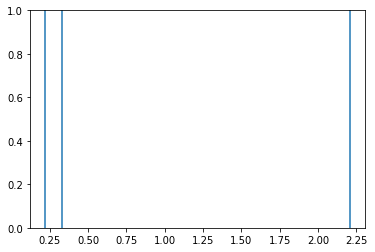

In [35]:
xcoords = [0.22058956, 0.33088437, 2.20589566]
for xc in xcoords:
    plt.axvline(x=xc)

In [ ]:
plt.plot([1,1,1],[1,2,5],'.')

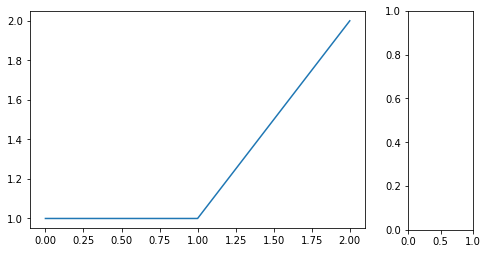

In [80]:
fig, ax = plt.subplots(1)
ax.plot([1,1,2])
# ax[0,1].tight_layout()
ax2 = fig.add_axes([1, 0.12, 0.15, 0.76])
